In [1]:
import os 
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib 
import sklearn as sk
from sklearn import cross_validation
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot as plt
from sklearn import *
from funk_py import *
%matplotlib inline


C:\Users\MDjerrab\Anaconda\lib\site-packages\sklearn\pls.py:7: DeprecationWarning: This module has been moved to cross_decomposition and will be removed in 0.16
  "removed in 0.16", DeprecationWarning)


In [2]:
print os.listdir(os.getcwd())    
os.chdir("C:\\")
os.listdir(r"C:\cygwin64\home\MDjerrab\AppGenomique\data")
os.chdir(r"C:\cygwin64\home\MDjerrab\AppGenomique\data")

['.ipynb_checkpoints', 'battery testing of models.ipynb', 'CodeR_LisonJb_V4.R', 'DEALING_WITH_MISSING_vals.R', 'FEATURE_WORKS', 'function_data.R', 'function_feature_work.R', 'funk_py.py', 'funk_py.pyc', 'TEST OKVR and OPERALIB.ipynb']


In [3]:
## Fichier CLEAN
data = pd.read_csv("DATA_CLEAN.csv",sep=";")
## drop ID RPT
data = data.drop("RPT",axis=1)
col_train = data.columns
data_test = pd.read_csv("leaderboard/CoreTable_leaderboard.csv")
col_test = data_test.columns

## Fichier DICO
dico = pd.read_csv('dico_table.csv',sep=";")
dico = dico.loc[dico.Table == "CoreTable",:]

In [4]:
print len(list(set(col_train) & set(col_test)))
print len(col_test)
print len(col_train)
print "LKADT_P" in col_test
print "LKADT_P" in col_train
data_test.LKADT_P.unique()  # Les colonnes existent mais sont vides
data_test.DEATH.unique()

110
131
112
True
True


array(['.'], dtype=object)

## DATA spliting

In [5]:
## Séparation en char et num
data_char,data_num = funk_data_cat_char_from_num(data)
## Target 1 : DEATH
trgt1 = data_num.pop('DEATH')
trgt1 = trgt1.to_frame()
## Target 2 : LKADT_P
trgt2 = data_num.pop('LKADT_P')
trgt2 = trgt2.to_frame()

STUDYID
ENDTRS_C
AGEGRP
AGEGRP2
RACE_C
REGION_C


In [6]:
## TRAIN and TEST
ratio= 0.6 # TRAIN 60% and TEST 40%
data_char_train, data_char_test = funk_split(data_char,ratio)
data_num_train, data_num_test = funk_split(data_num,ratio)
trgt1_train, trgt1_test = funk_split(trgt1,ratio)
trgt2_train, trgt2_test = funk_split(trgt2,ratio)

In [51]:
## Save
# os.mkdir("data_train_test_30-04-2015")
# data_char_train.to_csv(r"data_train_test_30-04-2015\data_char_train.csv",index =False)
# data_char_test.to_csv(r"data_train_test_30-04-2015\data_char_test.csv",index =False)
# data_num_train.to_csv(r"data_train_test_30-04-2015\data_num_train.csv",index =False)
# data_num_test.to_csv(r"data_train_test_30-04-2015\data_num_test.csv",index =False)
# trgt1_train.to_csv(r"data_train_test_30-04-2015\trgt1_train.csv",index =False)
# trgt1_test.to_csv(r"data_train_test_30-04-2015\trgt1_test.csv",index =False)
# trgt2_train.to_csv(r"data_train_test_30-04-2015\trgt2_train.csv",index =False)
# trgt2_test.to_csv(r"data_train_test_30-04-2015\trgt2_test.csv",index =False)

## DEATH

In [7]:
clf = linear_model.LogisticRegression(C=0.00001)
clf.fit(data_num_train, trgt1_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test,trgt1_test.iloc[:,0])))
# somme error
test = clf.predict(data_num_test)
test1 = trgt1_test.iloc[:,0]
print("La somme des erreurs est de " + str(sum(np.abs(test-test1))))
#le score est de 0.7578125
#La somme des erreurs est de 155 out of 640

le score est de 0.7578125
La somme des erreurs est de 155


In [8]:
clf = svm.SVC(kernel='linear', C=0.011)
#clf = linear_model.LogisticRegression(C=0.00001)
scores = cross_validation.cross_val_score(clf, data_num_test, trgt1_test.iloc[:,0], cv=3)
print scores.mean()
print scores
# 0.75785763
# array([ 0.72897196,  0.79342723,  0.75117371])

0.757857633861
[ 0.72897196  0.79342723  0.75117371]


## DUREE

In [9]:
svr_rbf = svm.SVR(kernel='rbf')#, C=1e3, gamma=0.1)
svr_lin = svm.SVR(kernel='linear')#, C=1e3)
svr_poly = svm.SVR(kernel='poly',degree=1)#, C=1e3, degree=2) #Si on passe à un degré supérieur  à 1 on a un temps long
l = [svr_rbf,svr_lin,svr_poly]

In [11]:
for clf in l:
    print(clf.kernel)
    clf.fit(data_num_train, trgt2_train.iloc[:,0])
    print("le score est de "+ str(clf.score(data_num_test,trgt2_test.iloc[:,0])))
    print('\n')
# RBF très mauvais  -0.0575
# LINEAR local best 0.4146
# Poly long et mauvais 0.29573   

rbf
le score est de -0.0575050414072


linear
le score est de 0.41462451486


poly
le score est de 0.29573664506




In [10]:
# Ridg better
clf = linear_model.Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,normalize=False, 
                         positive=False, precompute=False, tol=0.001, warm_start=False)
clf.fit(data_num_train, trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test,trgt2_test.iloc[:,0])))
# le score est de 0.552169123731

le score est de 0.492187500422


In [11]:
# Random Forest
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(data_num_train, trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test,trgt2_test.iloc[:,0])))

le score est de 0.666109752364


## DATA CHAR

#### RANDOM ORDER

In [12]:
## DATA randow order
for esc in data_char_train.columns:
    print len(np.unique(data_char_train.loc[:,esc]))

## DATA randow order
for esc in data_char_train.columns:
    print(np.unique(data_char_train.loc[:,esc]))

3
5
42
3
6
6
['ASCENT2' 'CELGENE' 'EFC6546']
['AE' 'complete' 'misce' 'possible_AE' 'progression']
['40' '41' '45' '46' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72' '73'
 '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '>=85']
['18-64' '65-74' '>=75']
['Asian' 'Black' 'Hispanic' 'Missing' 'Other' 'White']
['EASTERN EUROPE' 'MISSING' 'NORTH AMERICA' 'OTHER' 'SOUTH AMERICA'
 'WESTERN EUROPE']


In [13]:
##   Traitement de la data char
# # AGEGRP
# len(data.loc[data.AGEGRP =='>=85',:]) #27 seulement,  on va les passer ) 85 est on numérise la colonne
# # MODIF
data_char.AGEGRP[data_char.AGEGRP =='>=85'] = '85'
data_char_train.AGEGRP[data_char_train.AGEGRP =='>=85'] = '85'
data_char_test.AGEGRP[data_char_test.AGEGRP =='>=85'] = '85'
# # TO INT 
data_char.AGEGRP[data_char.AGEGRP =='>=85'] = [int(x) for x in data_char.AGEGRP]
data_char_train.AGEGRP = [int(x) for x in data_char_train.AGEGRP]
data_char_test.AGEGRP = [int(x) for x in data_char_test.AGEGRP]
# # RE CAT
data_num["AGEGRP"] = data_char.pop("AGEGRP")
data_num_test["AGEGRP"] = data_char_test.pop("AGEGRP")
data_num_train["AGEGRP"] = data_char_train.pop("AGEGRP")
# # Random Forest
# clf =RandomForestRegressor(random_state=1, n_estimators=100)
# clf.fit(data_num_train, trgt2_train.iloc[:,0])
# print("le score est de "+ str(clf.score(data_num_test,trgt2_test.iloc[:,0]))) # petite amélioration
# # le score est de 0.668813515758

In [14]:
test = funk_increment_col(data_char_train)
test1 = funk_increment_col(data_char_test)
for esc in data_char_train.columns:
    print(np.unique(data_char_train.loc[:,esc]))
    
print len(data_num_train.columns)
print len(data_num_test.columns)
data_num_train = pd.concat([data_num_train,test],axis=1)
data_num_test = pd.concat([data_num_test,test1],axis=1)
print len(data_num_train.columns)
print len(data_num_test.columns)

clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(data_num_train, trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test,trgt2_test.iloc[:,0])))
#  le score est de 0.660608334596  # AUCUNE AM2LIORATION

['ASCENT2' 'CELGENE' 'EFC6546']
['AE' 'complete' 'misce' 'possible_AE' 'progression']
['18-64' '65-74' '>=75']
['Asian' 'Black' 'Hispanic' 'Missing' 'Other' 'White']
['EASTERN EUROPE' 'MISSING' 'NORTH AMERICA' 'OTHER' 'SOUTH AMERICA'
 'WESTERN EUROPE']
105
105
110
110
le score est de 0.660608334596


##### PCA

In [15]:
# On recharge les données de travails
[data_char_train,data_char_test,data_num_train,
data_num_test,trgt1_train,trgt1_test,trgt2_train,
trgt2_test] = funk_charge_set_data("data_train_test_30-04-2015")             

In [16]:
# PCA
pca = PCA()
X_pca = pca.fit_transform(data_num_train)
pca = PCA()
X_pca1 = pca.fit_transform(data_num_test)
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(X_pca, trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(X_pca1,trgt2_test.iloc[:,0])))

le score est de 0.302311632205


In [17]:
# KPCA
from sklearn.decomposition import PCA, KernelPCA

X = data_num_train.copy()
kpca = KernelPCA(kernel="rbf", gamma=0.1)
kpca1 = KernelPCA(kernel="rbf", gamma=0.1)
X_kpca = kpca.fit_transform(data_num_train)
X_kpca1 = kpca1.fit_transform(data_num_test)
print X_kpca.shape
print X_kpca1.shape
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(X_pca[:,0:100], trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(X_kpca1[:,0:100],trgt2_test.iloc[:,0])))
# MAUVAIS RESULTAT

(960L, 959L)
(640L, 640L)
le score est de -0.0835017900339


##### SHANNON

In [95]:
# FAIRE une réduction à la shanon 
def funk_enthropy(test):
    return(-sum([x*np.log(x) for x in test if x!=0]))
test = data_num_train.copy()
test["DEATH"] =trgt1_train.DEATH
res = pd.DataFrame(test.columns[0:(len(test.columns)-1)],columns=["DEATH"])
res["shannon"]=0
test_1 = (1/len(test))*test.groupby("DEATH").sum()
ll=[]
for esc in range(len(test_1.T)):
    ll.append(funk_enthropy(test_1.iloc[:,esc]))
res.shannon = ll 

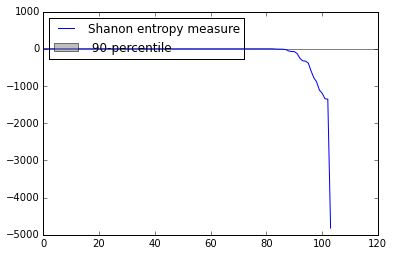

93


In [106]:
test = res.sort(['shannon'],ascending=[0])
val = np.percentile(test.iloc[:,1],90)

plt.figure()
plt.plot(test.iloc[:,1], label ="Shanon entropy measure")
plt.axhspan(0, val, xmin=0, xmax=16000 ,facecolor='0.5', alpha=0.5,label =" 90-percentile ")
plt.legend(loc='upper left')
plt.savefig(r'C:\Users\MDjerrab\Desktop\Altegrad\Altegrad_project\Shanon_reduction.png', format='png', dpi=1000)
plt.show()

## Feature reduction
name_feat_reduce = (test.loc[test.iloc[:,1]<val,'DEATH']).tolist()
print len(np.unique(name_feat_reduce))


In [107]:
data_num_train.loc[:,name_feat_reduce]
#clf =RandomForestRegressor(random_state=1, n_estimators=100)
#clf.fit(data_num_train.loc[:,name_feat_reduce], trgt2_train.iloc[:,0])
#print("le score est de "+ str(clf.score(data_num_test.loc[:,name_feat_reduce],trgt2_test.iloc[:,0])))
clf =ensemble.RandomForestClassifier(random_state=1, n_estimators=100)
clf.fit(data_num_train.loc[:,name_feat_reduce], trgt1_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test.loc[:,name_feat_reduce],trgt1_test.iloc[:,0])))
#  le score est de 0.345302010234 # SHANON MAUVAISE IDEE

le score est de 0.8625


In [1]:
#test = pd.DataFrame(clf.feature_importances_)
#test.index=data_num_train.loc[:,name_feat_reduce].columns
#test.sort([0],ascending=[0])

In [39]:
data_num_train.loc[:,name_feat_reduce]
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(data_num_train.loc[:,name_feat_reduce], trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test.loc[:,name_feat_reduce],trgt2_test.iloc[:,0])))
#  le score est de 0.345302010234 # SHANON MAUVAISE IDEE

le score est de 0.668031594331


In [40]:
clf = linear_model.LogisticRegression(C=0.00001)
clf.fit(data_num_train.loc[:,name_feat_reduce], trgt1_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test.loc[:,name_feat_reduce],trgt1_test.iloc[:,0])))
# somme error
test = clf.predict(data_num_test.loc[:,name_feat_reduce])
test1 = trgt1_test.iloc[:,0]
print("La somme des erreurs est de " + str(sum(np.abs(test-test1))))

le score est de 0.7578125
La somme des erreurs est de 155


##### MAPING ON NUM

In [31]:
test_train = funk_convers_vector_num(data_char_train,data_num_train)
test_test = funk_convers_vector_num(data_char_test,data_num_test)

In [37]:
test = funk_convers_vector_num(data_char,data_num)
print test.shape
[test,test1] = funk_data_cat_char_from_num(test)
[test_tr,test_te] = funk_split(test1,ratio)


(1600, 1040)
STUDYID
ENDTRS_C
AGEGRP2
RACE_C
REGION_C


In [119]:
clf = linear_model.LogisticRegression(C=0.00001)
clf.fit(test_tr, trgt1_train.iloc[:,0])
#print("le score est de "+ str(clf.score(test_te,trgt1_test.iloc[:,0])))
# somme error
#test = clf.predict(test_te)
test1 = trgt1_test.iloc[:,0]
#print("La somme des erreurs est de " + str(sum(np.abs(test-test1))))
#le score est de 0.7578125
#La somme des erreurs est de 155 out of 640

le score est de 0.67287259655


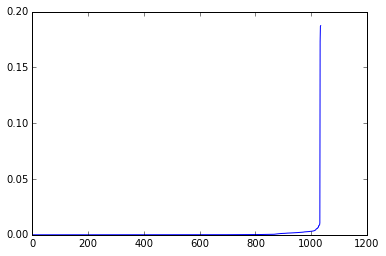

In [120]:
# Random Forest
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(test_tr, trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(test_te,trgt2_test.iloc[:,0])))
test_1 = clf.feature_importances_
plt.plot(np.sort(test_1)) ## on prends les 200 apeu près supérieur

In [121]:
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(test_tr.iloc[:,np.argsort(test_1)[800:]], trgt2_train.iloc[:,0])
print("le score est de "+ str(clf.score(test_te.iloc[:,np.argsort(test_1)[800:]],
                                        trgt2_test.iloc[:,0])))
# le score est de 0.677011081339

le score est de 0.677011081339


#### CASCADE

In [40]:
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(data_num_train, trgt1_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test,trgt1_test.iloc[:,0])))
#  le score est de 0.660608334596  # AUCUNE AM2LIORATION

le score est de 0.587148179715


In [41]:
clf = linear_model.LogisticRegression(C=0.00001)
clf.fit(data_num_train, trgt1_train.iloc[:,0])
test = data_num_train.copy()
test["DEATH"] = pd.DataFrame(clf.predict(data_num_train))
test1 = data_num_test.copy()
test1["DEATH"] = pd.DataFrame(clf.predict(data_num_test))
clf =RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(test, trgt2_train.iloc[:,0])

print("le score est de "+ str(clf.score(test1,trgt2_test.iloc[:,0])))
## le score est de 0.663595710366

le score est de 0.663595710366


In [33]:
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 10, 5
clf = Ridge(alpha=1) # 0.49125985581809783
clf = linear_model.Lasso(alpha=5) # 0.50257252868909652
#clf = svm.SVR(kernel='poly',degree=3)#, C=1e3)
clf.fit(test, trgt2_train.iloc[:,0]) 
clf.score(test1, trgt2_test.iloc[:,0]) 

0.50257252868909652

In [34]:
## Random Forest Classifier
clf =ensemble.RandomForestClassifier(random_state=1, n_estimators=100)
clf.fit(data_num_train, trgt1_train.iloc[:,0])
print("le score est de "+ str(clf.score(data_num_test,trgt1_test.iloc[:,0])))
# somme error
test = clf.predict(data_num_test)
test1 = trgt1_test.iloc[:,0]
print("La somme des erreurs est de " + str(sum(np.abs(test-test1))))
#le score est de 0.7578125
#La somme des erreurs est de 155 out of 640

le score est de 0.8546875
La somme des erreurs est de 93


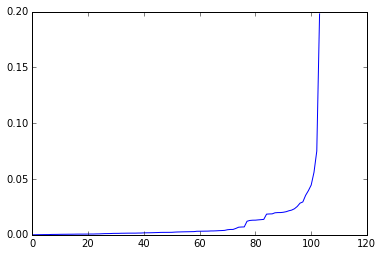

In [35]:
test_1 = clf.feature_importances_

plt.plot(np.sort(test_1)) ## on 

In [36]:
data_num_train.columns[np.argsort(test_1)[80:]]

Index([u'PHOS', u'CCRC', u'MG', u'SODIUM', u'ALT', u'HEIGHTBL', u'ALB', u'CREAT', u'TBILI', u'NEU', u'CA', u'WEIGHTBL', u'PLT', u'AST', u'WBC', u'BMI', u'PSA', u'HB', u'ENTRT_PC', u'ALP', u'PER_REF', u'LKADT_REF', u'Unnamed: 0', u'LDH'], dtype='object')